In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing # We will be using this only for the data
import numpy as np

In [2]:
housing = fetch_california_housing(as_frame=True) # Loads example dataset, returns a dict with some additional information
print(housing["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
data = housing["frame"]

In [4]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


---


# removing Nan

In [7]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [8]:
data = data.dropna()

---

# built in data plotting

In [9]:
data["MedHouseVal"].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

<AxesSubplot: >

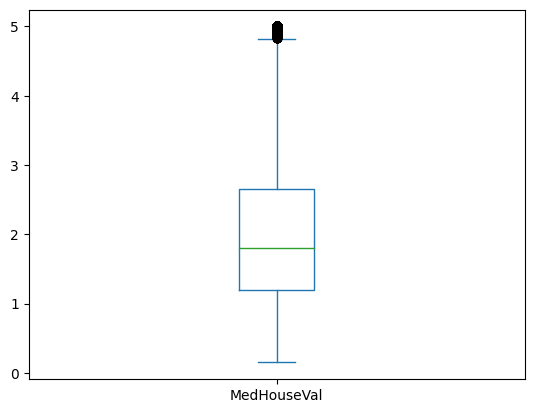

In [10]:
data["MedHouseVal"].plot(kind="box")

<AxesSubplot: ylabel='Frequency'>

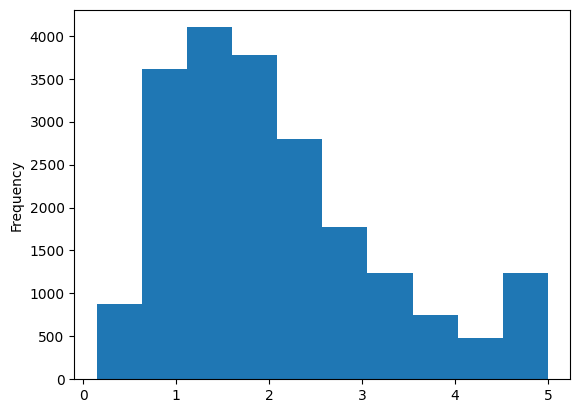

In [11]:
data["MedHouseVal"].plot(kind="hist")

---

# Plotting and seaborn

In [12]:
import seaborn as sns

In [13]:
# Reducing sample size to increase plotting speed
import numpy as np # Only used for reducing sample size

rng = np.random.RandomState(4444)
selected = rng.choice(np.arange(data.shape[0]), size = 500, replace=False) # randomly select 500 rows to be used as a sample 

# Creating graphs

<AxesSubplot: xlabel='MedInc', ylabel='MedHouseVal'>

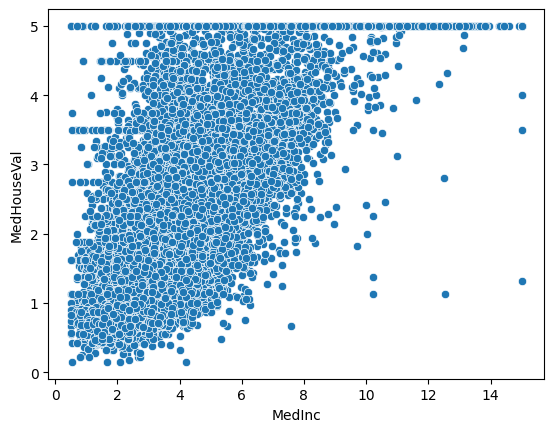

In [14]:
sns.scatterplot(data,x="MedInc",y="MedHouseVal")

# Longitude, Latitude, Hue and size

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

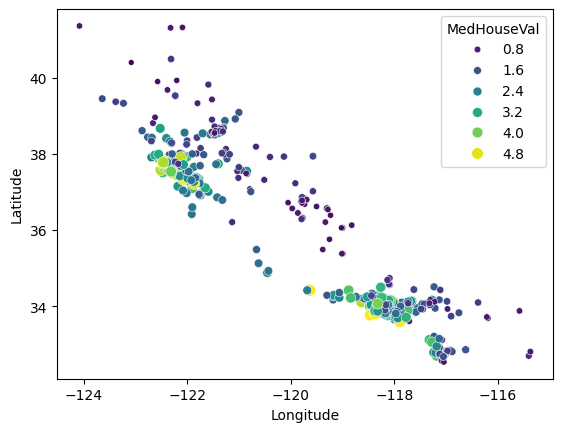

In [37]:
sns.scatterplot(data.loc[selected], x="Longitude", y="Latitude",hue="MedHouseVal", size="MedHouseVal" ,palette="viridis",alpha=0.4)

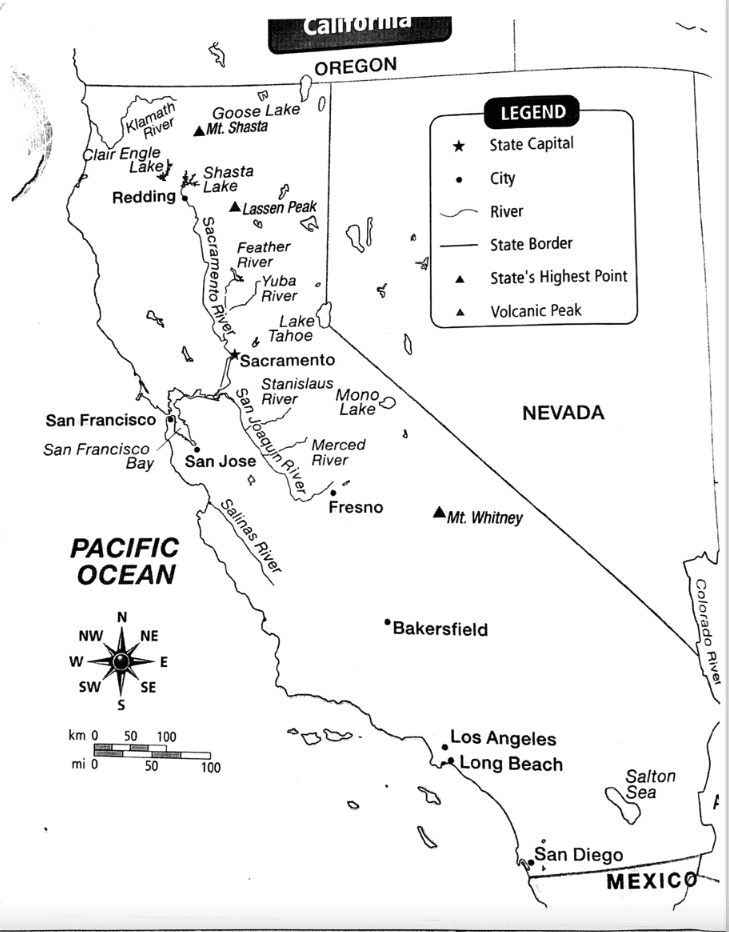

# Pairplots


Pair plots gives us a quick good overview of all the relationships between variables

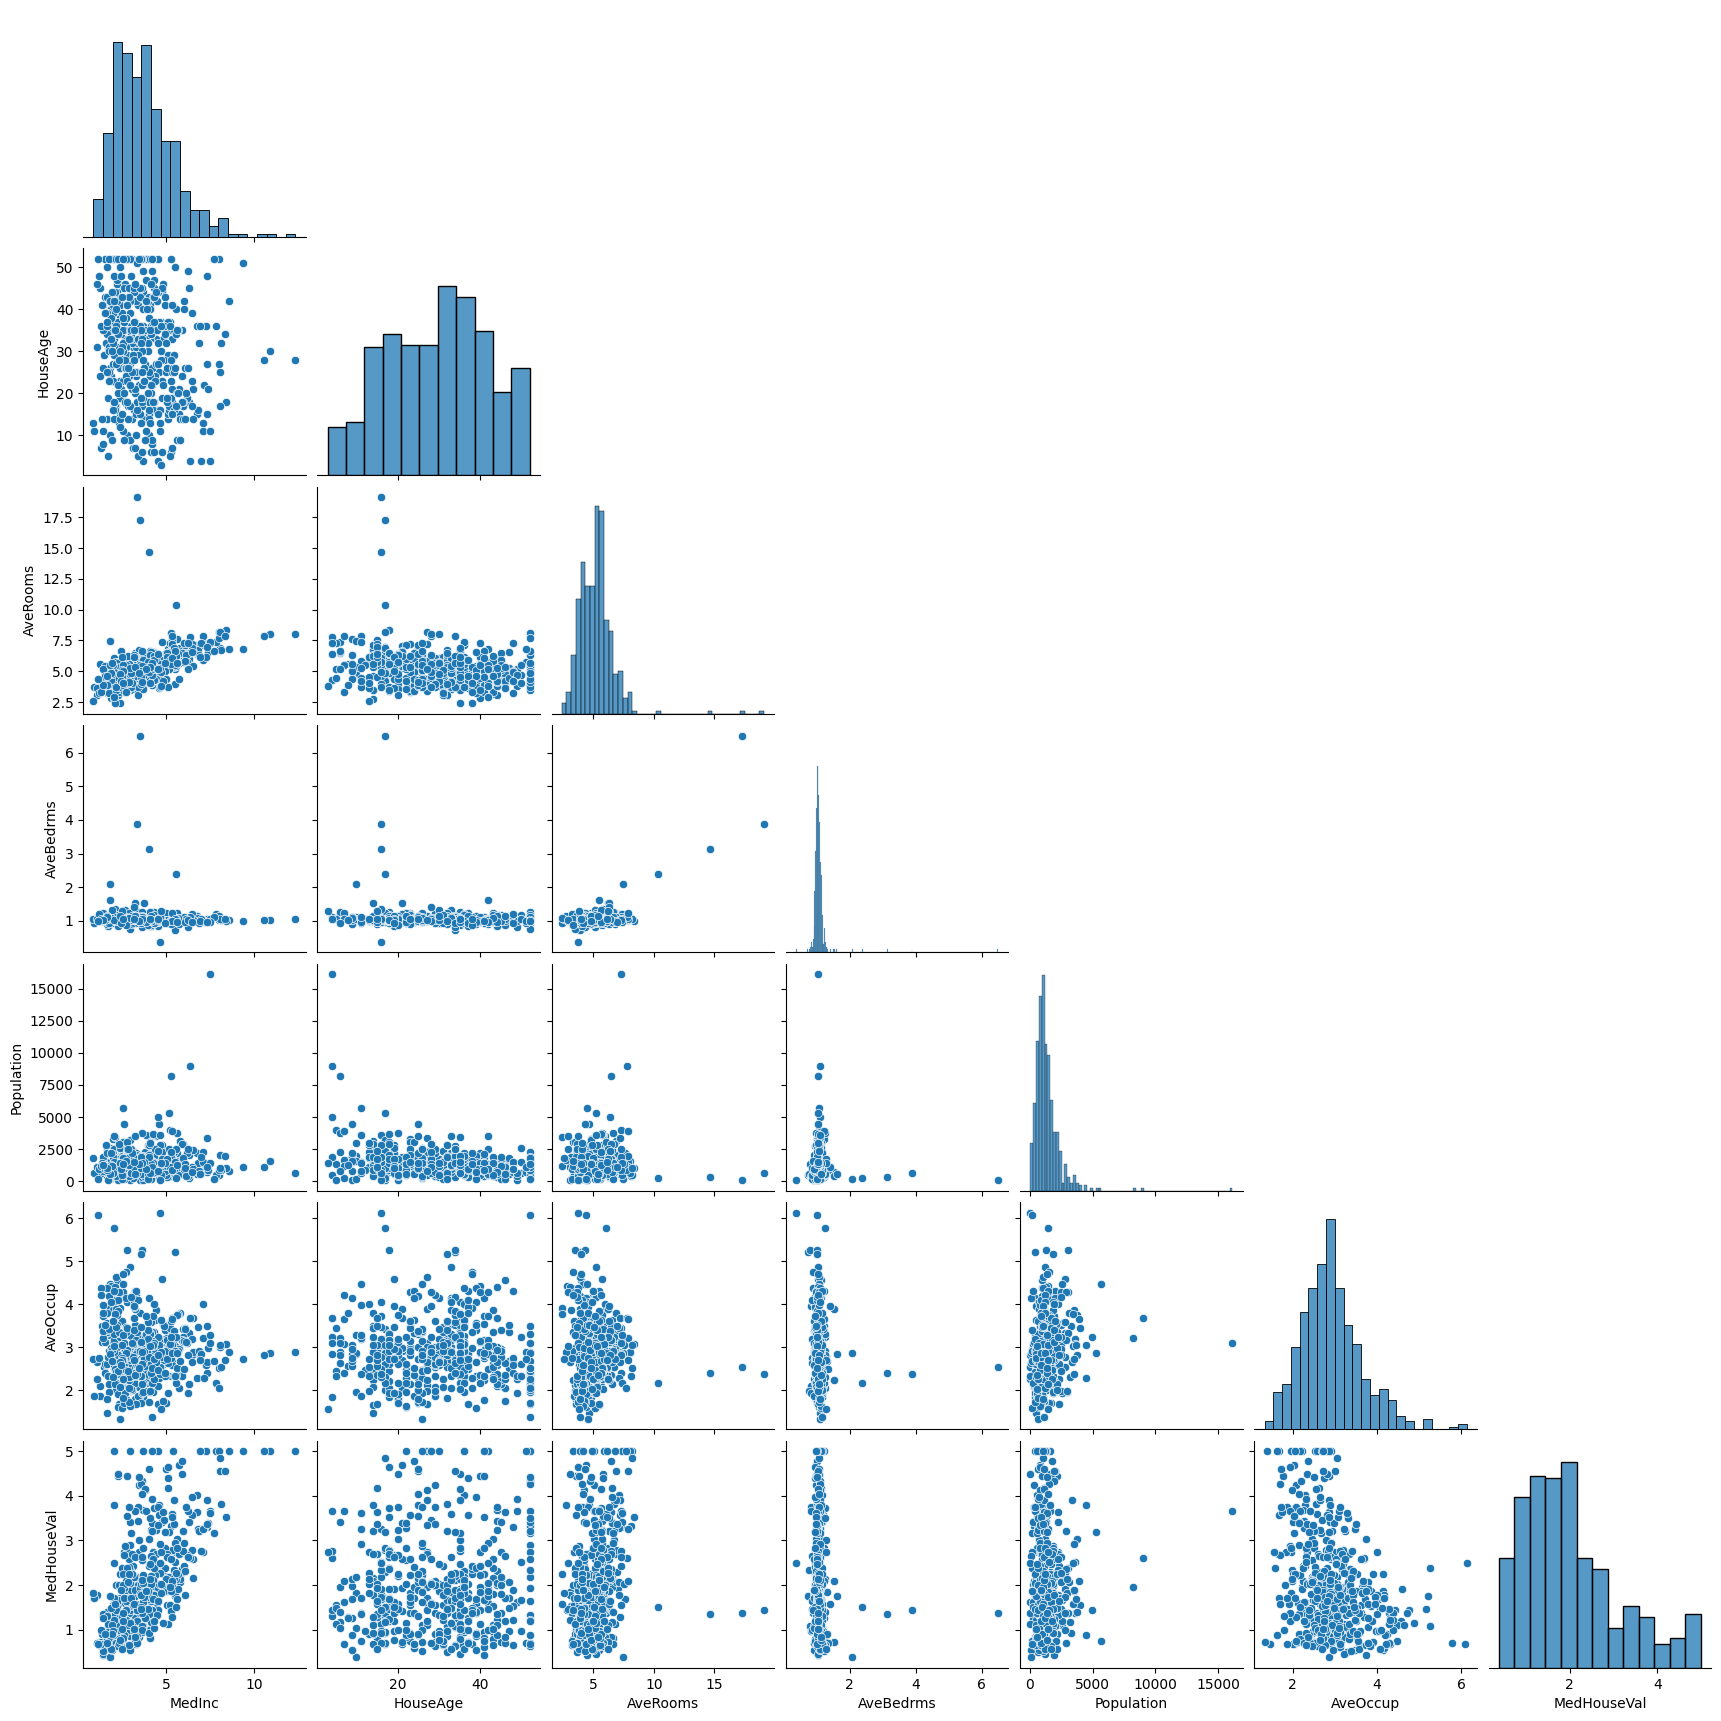

In [16]:
pair_plot_data = data.loc[selected].drop(columns=["Longitude", "Latitude"]) # Filter out selected sample and drop out the longitude and latitude data

sns.pairplot(pair_plot_data,corner=True)

In [17]:
data["AveOccup"].describe()

count    20640.000000
mean         3.070655
std         10.386050
min          0.692308
25%          2.429741
50%          2.818116
75%          3.282261
max       1243.333333
Name: AveOccup, dtype: float64

In [33]:
filt = data["AveOccup"] > 1000


In [30]:
data.loc[filt]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
91,0.8668,52.0,2.443182,0.988636,904.0,10.272727,37.80,-122.28,1.37500
270,3.8750,33.0,3.021277,0.659574,575.0,12.234043,37.78,-122.18,2.25000
1039,4.3029,16.0,6.090592,1.121951,4930.0,17.177700,38.42,-120.97,1.21900
1067,3.4191,52.0,4.530612,0.816327,1107.0,11.295918,39.73,-121.85,1.37500
1617,11.7064,17.0,9.361702,1.127660,1722.0,12.212766,37.84,-122.08,5.00001
2511,4.6250,36.0,24.500000,3.500000,28.0,14.000000,36.51,-119.54,1.62500
2723,3.4107,13.0,5.156250,1.125000,822.0,12.843750,32.75,-115.50,1.42500
2899,1.9125,35.0,2.926829,0.853659,477.0,11.634146,35.37,-119.01,0.47500
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500
4479,3.5769,41.0,4.940000,1.100000,925.0,18.500000,34.07,-118.16,1.35700


In [31]:
data_2 = data.loc[~filt]

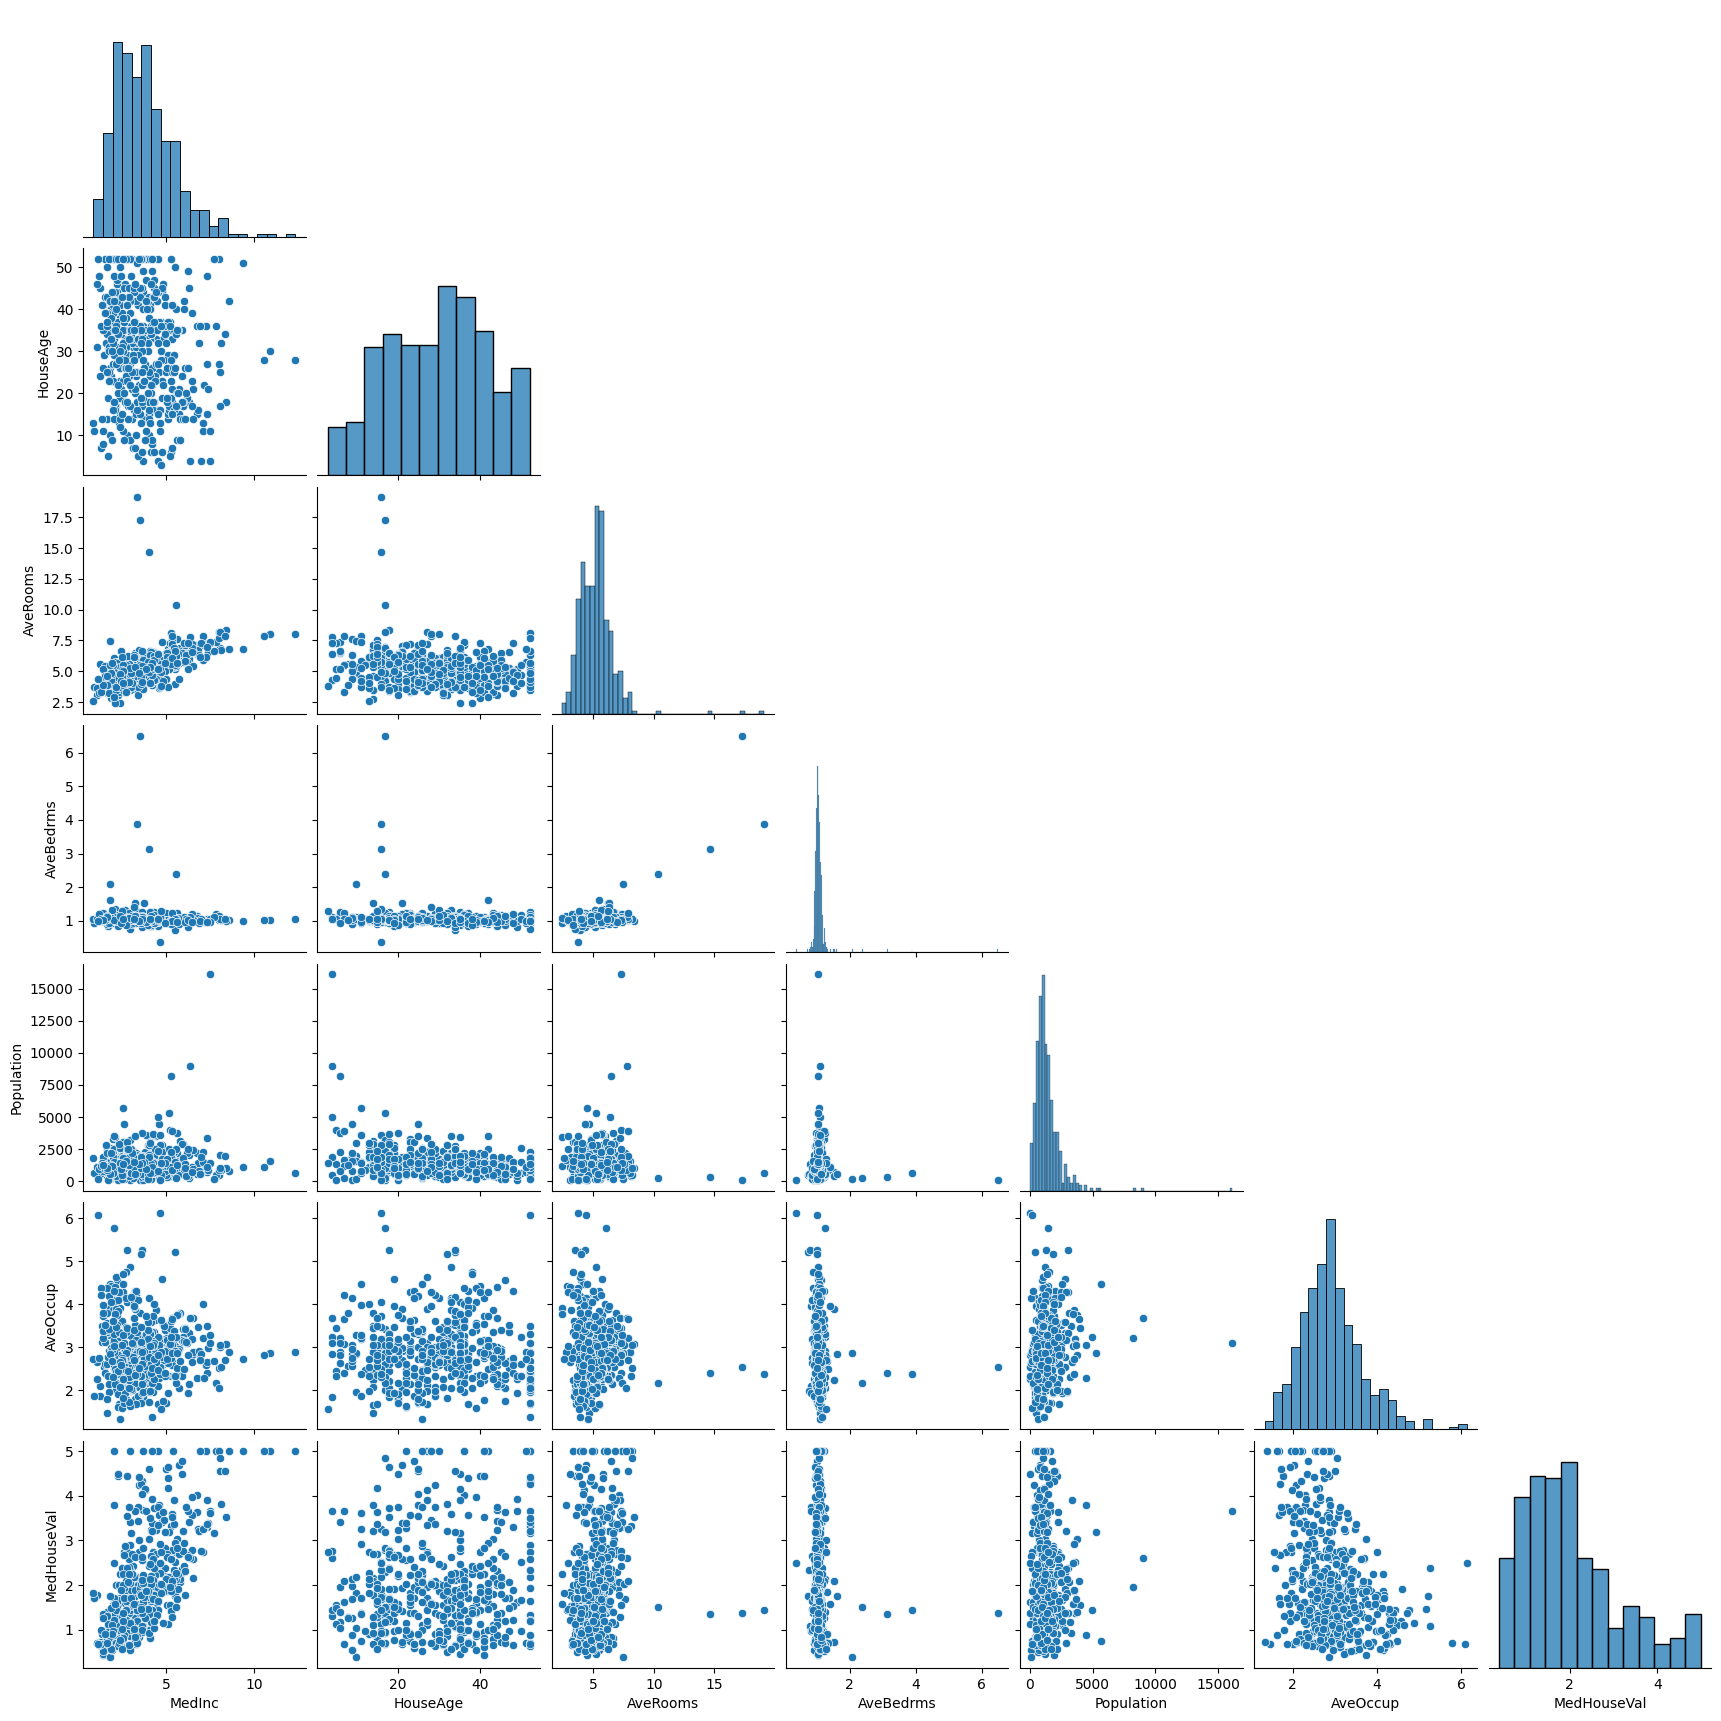

In [32]:
pair_plot_data = data_2.loc[selected].drop(columns=["Longitude", "Latitude"]) # Filter out selected sample and drop out the longitude and latitude data

sns.pairplot(pair_plot_data,corner=True)

# Heat maps

Heat maps are best used to show correlations between variables

<AxesSubplot: >

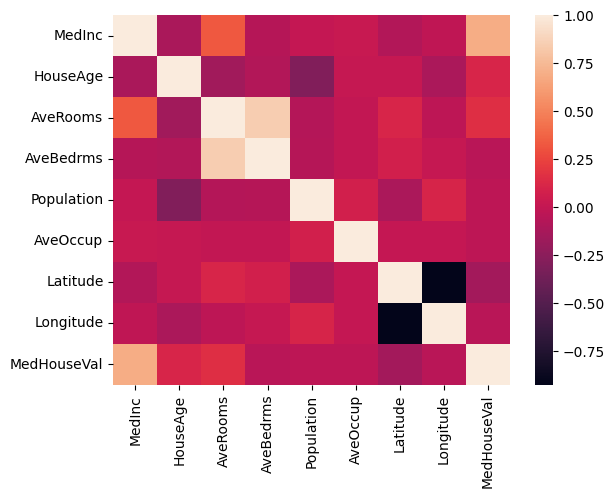

In [36]:
sns.heatmap(data.corr())